In [205]:
categories = ['Positive', 'Negetive']

In [206]:
import pandas as pd
data = pd.read_table('C:/Users/AmazeTim/Desktop/JuypterFile/DM2020-Lab1-Master-master/sentiment labelled sentences/imdb_labelled.txt',header=None,encoding='utf8')

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [207]:
print(data[0][:3])

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
Name: 0, dtype: object


In [208]:
X = pd.DataFrame(list(data[0]), columns= ['text'])

In [209]:
X['Score']= data[1] 

In [210]:
f= lambda s: 'Positive' if s == 1 else 'Negetive' #my method
X['category_name'] = X.Score.apply(lambda x: f(x))

In [211]:
X

,text,Score,category_name
0,"A very, very, very slow-moving, aimless movie ...",0,Negetive
1,Not sure who was more lost - the flat characte...,0,Negetive
2,Attempting artiness with black & white and cle...,0,Negetive
3,Very little music or anything to speak of.,0,Negetive
4,The best scene in the movie was when Gerardo i...,1,Positive
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,Negetive
744,"Unfortunately, any virtue in this film's produ...",0,Negetive
745,"In a word, it is embarrassing.",0,Negetive
746,Exceptionally bad!,0,Negetive


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [212]:
X.sort_values(by='Score')[::10]

,text,Score,category_name
0,"A very, very, very slow-moving, aimless movie ...",0,Negetive
355,This movie is a solid example of a bad plot an...,0,Negetive
337,"first of all, there are enough racial stereoty...",0,Negetive
403,There is simply no excuse for something this p...,0,Negetive
386,Generally; it just lacked imagination.,0,Negetive
...,...,...,...
193,This is high adventure at its best.,1,Positive
456,There still are good actors around!,1,Positive
446,"Overall, a delight!",1,Positive
486,This is definitely one of the better documenta...,1,Positive


### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```Positive``` category, and query every 10th record. Only show the first 5 records.

In [213]:
Y = X[X['category_name'] == 'Positive']
Y[::10][0:5]

,text,Score,category_name
4,The best scene in the movie was when Gerardo i...,1,Positive
18,It's practically perfect in all of them  a tr...,1,Positive
29,Definitely worth checking out.,1,Positive
57,"Some applause should be given to the ""prelude""...",1,Positive
83,This is definitely a cult classic well worth v...,1,Positive


In [214]:
X.isnull()

,text,Score,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
743,False,False,False
744,False,False,False
745,False,False,False
746,False,False,False


In [215]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,Score,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [216]:
X.T.isnull().apply(lambda x: dmh.check_missing_values(x))

,0,1,2,3,4,5,6,7,8,9,...,738,739,740,741,742,743,744,745,746,747
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,...,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [217]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [218]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
The reason why isnull function don`t work is because the funchtion determine the bool value by the cell value is exsist or not.
Respond to value of the cell above:
* cell_1: function np.nan will return NaN means the value is null 
* cell_2: the value is null
* cell_3: string type value 'NaN'
* cell_4: string type value 'None'
* cell_5: const value of null value
* cell_6: string type value ''

In [219]:
X_sample = X.sample(n=256) #random state

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

131


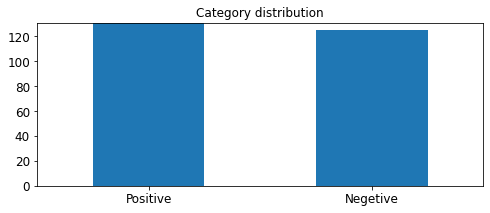

In [221]:
# Answer here
Max_Bar=X_sample["category_name"].describe().freq
print(Max_Bar)
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, Max_Bar], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

Positive    131
Negetive    125
Name: category_name, dtype: int64
Positive    386
Negetive    362
Name: category_name, dtype: int64


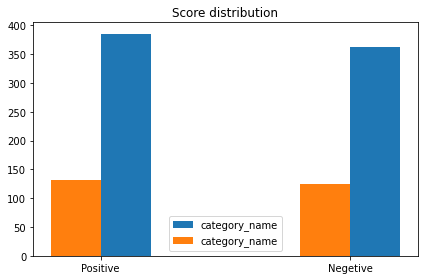

In [222]:
# Answer here
Population = X.category_name.value_counts()
Sample = X_sample.category_name.value_counts()
print(Sample)
print(Population)
x = np.arange(len(np.array([0,1])))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots()
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.bar(x+width ,Population, width*2, label='category_name')
ax.bar(x-width ,Sample, width*2, label='category_name')
ax.set_title('Score distribution')
ax.set_xticks(x)
ax.set_xticklabels(Population.index)
ax.legend()
fig.tight_layout()
plt.show()

In [223]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [224]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)


In [225]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [226]:
analyze((" ".join(list(X[0:1].text))))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [227]:
X_counts.shape

(748, 3047)

In [228]:
count_vect.get_feature_names()[0:20]

['10',
 '12',
 '13',
 '15',
 '15pm',
 '17',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2005',
 '2006']

In [229]:
X_counts[0:5, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

### **>>> Exercise 10 (take home):**
Notice that there is only one 1 in the fourth record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [230]:
a=X_counts[0:5, 0:200].toarray()
for i in range(200):
    if a[3,i]==1:
        print(count_vect.get_feature_names()[i])

anything


In [231]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [232]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [233]:
plot_z = X_counts[0:20, 0:20].toarray()

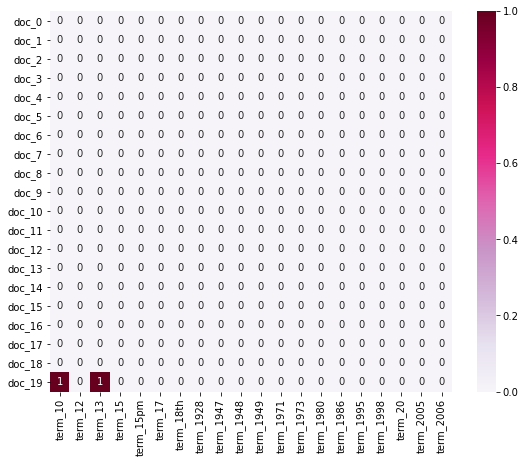

In [234]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

* Exercise11 Computing By Colab: 
https://colab.research.google.com/drive/1N5Qs9jpVBThRmtBWrmBi9vSULgR1wdhW#scrollTo=Onu_adO9Zs4O&line=2&uniqifier=1

In [265]:
from sklearn.decomposition import PCA
categories

['Positive', 'Negetive']

In [266]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

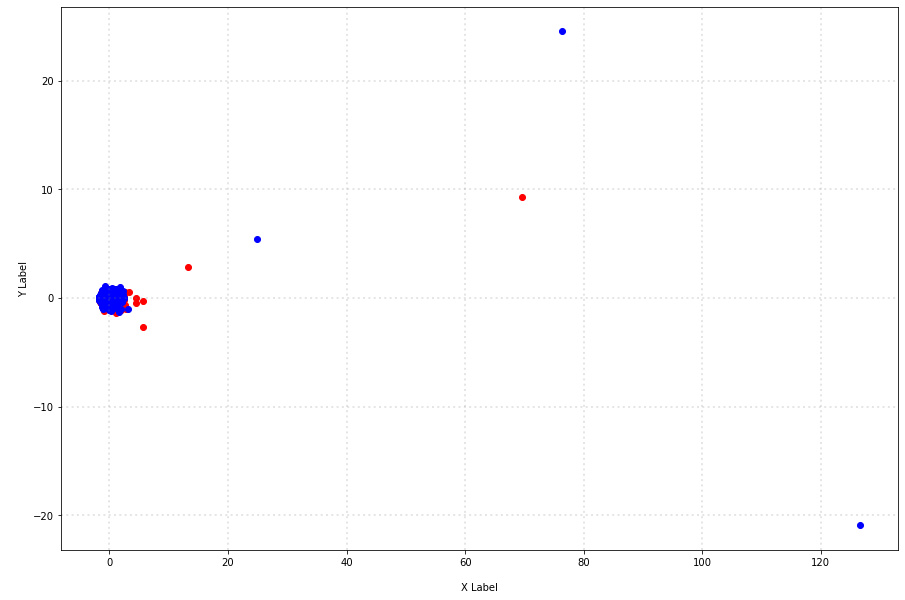

In [267]:
col = ['red', 'blue']

# plot
fig = plt.figure(figsize = (15,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

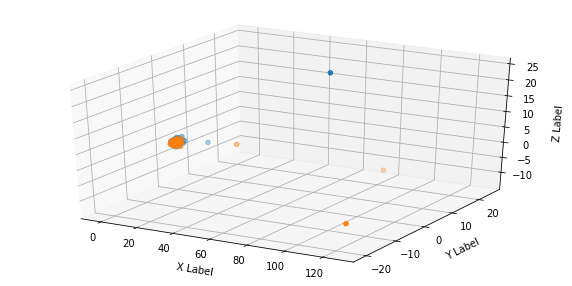

In [268]:
# Answer here
X_3reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['red', 'blue']

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_3reduced[X['category_name'] == category].T[0]
    ys = X_3reduced[X['category_name'] == category].T[1]
    zs = X_3reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [269]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [270]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

29

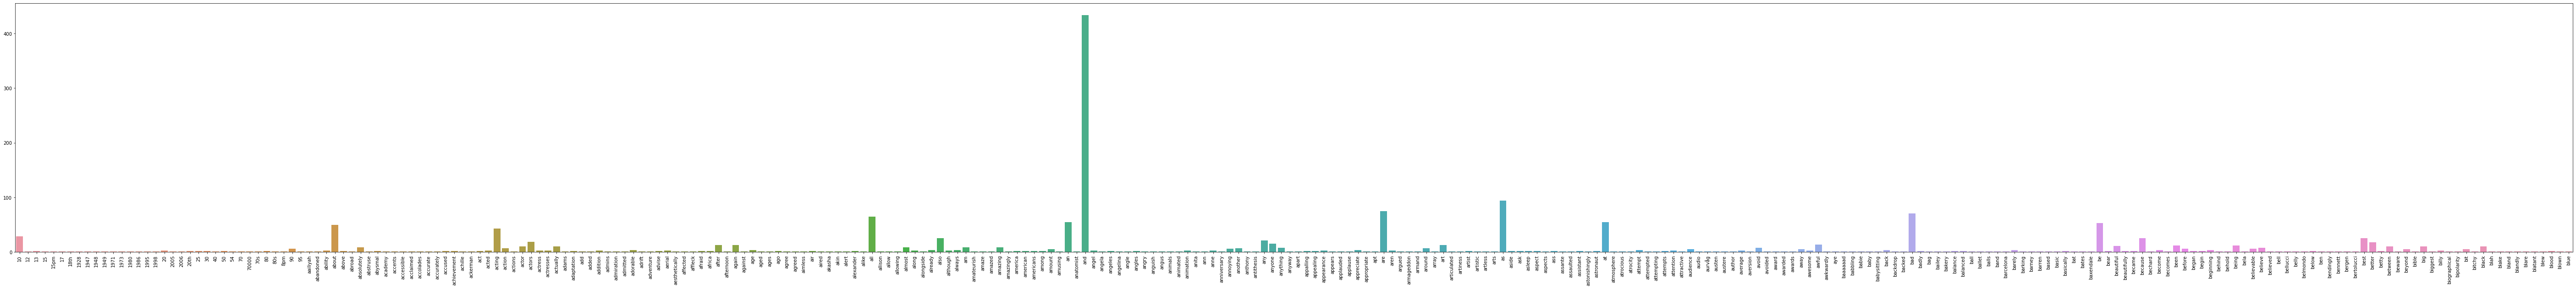

In [271]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

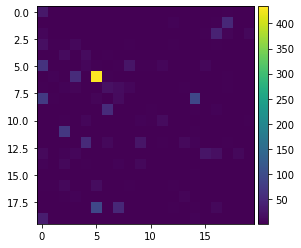

In [272]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.subplot(111)
im = ax.imshow(term_frequencies[:400].reshape((20, 20)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im,cax=cax)
plt.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


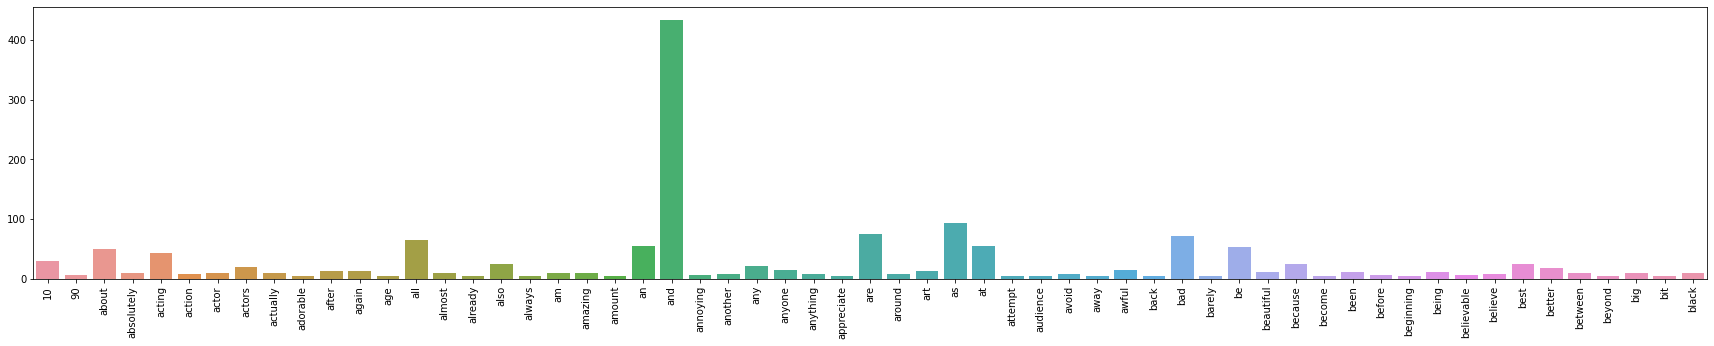

In [273]:
plt.subplots(figsize=(30, 5))
xim=[]
yim=[]
for i in range (300) :
    if (term_frequencies[i] > int(3) ):
        xim.append(count_vect.get_feature_names()[i])
        yim.append(term_frequencies[i])
g = sns.barplot(x= xim , 
            y=yim)
g.set_xticklabels(xim, rotation = 90);

In [274]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [275]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.Score)
X['bin_category'] = mlb.transform(X['Score']).tolist()
X[0:9]

,text,Score,category_name,unigrams,bin_category,bin_category_name
0,"A very, very, very slow-moving, aimless movie ...",0,Negetive,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",[0],[0]
1,Not sure who was more lost - the flat characte...,0,Negetive,"[Not, sure, who, was, more, lost, -, the, flat...",[0],[0]
2,Attempting artiness with black & white and cle...,0,Negetive,"[Attempting, artiness, with, black, &, white, ...",[0],[0]
3,Very little music or anything to speak of.,0,Negetive,"[Very, little, music, or, anything, to, speak,...",[0],[0]
4,The best scene in the movie was when Gerardo i...,1,Positive,"[The, best, scene, in, the, movie, was, when, ...",[1],[1]
5,"The rest of the movie lacks art, charm, meanin...",0,Negetive,"[The, rest, of, the, movie, lacks, art, ,, cha...",[0],[0]
6,Wasted two hours.,0,Negetive,"[Wasted, two, hours, .]",[0],[0]
7,Saw the movie today and thought it was a good ...,1,Positive,"[Saw, the, movie, today, and, thought, it, was...",[1],[1]
8,A bit predictable.,0,Negetive,"[A, bit, predictable, .]",[0],[0]


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [276]:
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X.category_name)
mlb2.classes_
X['bin_category_name'] = mlb2.transform(X['category_name']).tolist()
X[0:9]

,text,Score,category_name,unigrams,bin_category,bin_category_name
0,"A very, very, very slow-moving, aimless movie ...",0,Negetive,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",[0],[0]
1,Not sure who was more lost - the flat characte...,0,Negetive,"[Not, sure, who, was, more, lost, -, the, flat...",[0],[0]
2,Attempting artiness with black & white and cle...,0,Negetive,"[Attempting, artiness, with, black, &, white, ...",[0],[0]
3,Very little music or anything to speak of.,0,Negetive,"[Very, little, music, or, anything, to, speak,...",[0],[0]
4,The best scene in the movie was when Gerardo i...,1,Positive,"[The, best, scene, in, the, movie, was, when, ...",[1],[1]
5,"The rest of the movie lacks art, charm, meanin...",0,Negetive,"[The, rest, of, the, movie, lacks, art, ,, cha...",[0],[0]
6,Wasted two hours.,0,Negetive,"[Wasted, two, hours, .]",[0],[0]
7,Saw the movie today and thought it was a good ...,1,Positive,"[Saw, the, movie, today, and, thought, it, was...",[1],[1]
8,A bit predictable.,0,Negetive,"[A, bit, predictable, .]",[0],[0]
